In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# File to Load
file_to_load = "Resources/owid-covid-data.csv"

# Read the COVID data
covid_data = pd.read_csv(file_to_load)

In [2]:
# Display the data table for preview
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
# Create new DataFrame with information of interest only
stringency = covid_data[['location', 'date', 'stringency_index', 'total_deaths_per_million','new_deaths_smoothed_per_million', 'total_cases_per_million', 'new_cases_smoothed_per_million']]
stringency.head()

,location,date,stringency_index,total_deaths_per_million,new_deaths_smoothed_per_million,total_cases_per_million,new_cases_smoothed_per_million
0,Afghanistan,2020-02-24,8.33,NaN,NaN,0.126,NaN
1,Afghanistan,2020-02-25,8.33,NaN,NaN,0.126,NaN
2,Afghanistan,2020-02-26,8.33,NaN,NaN,0.126,NaN
3,Afghanistan,2020-02-27,8.33,NaN,NaN,0.126,NaN
4,Afghanistan,2020-02-28,8.33,NaN,NaN,0.126,NaN


In [4]:
# Create a clean DataFrame by dropping any na and duplicate data
clean_stringency = stringency.dropna(inplace=False).drop_duplicates()
clean_stringency.head()

,location,date,stringency_index,total_deaths_per_million,new_deaths_smoothed_per_million,total_cases_per_million,new_cases_smoothed_per_million
28,Afghanistan,2020-03-23,41.67,0.025,0.004,1.004,0.054
29,Afghanistan,2020-03-24,50.93,0.025,0.004,1.054,0.057
30,Afghanistan,2020-03-25,59.26,0.025,0.004,1.858,0.172
31,Afghanistan,2020-03-26,59.26,0.050,0.007,2.008,0.194
32,Afghanistan,2020-03-27,59.26,0.050,0.007,2.284,0.240


In [5]:
# Check data types
clean_stringency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86419 entries, 28 to 116539
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         86419 non-null  object 
 1   date                             86419 non-null  object 
 2   stringency_index                 86419 non-null  float64
 3   total_deaths_per_million         86419 non-null  float64
 4   new_deaths_smoothed_per_million  86419 non-null  float64
 5   total_cases_per_million          86419 non-null  float64
 6   new_cases_smoothed_per_million   86419 non-null  float64
dtypes: float64(5), object(2)
memory usage: 5.3+ MB


In [6]:
# Rename column headers
rename_stringency = clean_stringency.rename(columns={"location": "Location",
                                               "date": "Date",
                                               "stringency_index": "Stringency Index",
                                               "total_deaths_per_million": "Total Deaths Per Million",
                                               "new_deaths_smoothed_per_million": "Total Deaths Smoothed Per Million",
                                               "total_cases_per_million": "Total Cases Per Million",
                                               "new_cases_smoothed_per_million": "Total Cases Smoothed Per Million"})
rename_stringency

,Location,Date,Stringency Index,Total Deaths Per Million,Total Deaths Smoothed Per Million,Total Cases Per Million,Total Cases Smoothed Per Million
28,Afghanistan,2020-03-23,41.67,0.025,0.004,1.004,0.054
29,Afghanistan,2020-03-24,50.93,0.025,0.004,1.054,0.057
30,Afghanistan,2020-03-25,59.26,0.025,0.004,1.858,0.172
31,Afghanistan,2020-03-26,59.26,0.050,0.007,2.008,0.194
32,Afghanistan,2020-03-27,59.26,0.050,0.007,2.284,0.240
...,...,...,...,...,...,...,...
116535,Zimbabwe,2021-09-02,78.70,294.789,0.880,8290.259,10.715
116536,Zimbabwe,2021-09-03,78.70,295.319,0.786,8304.372,10.365
116537,Zimbabwe,2021-09-04,78.70,295.915,0.719,8310.600,10.015
116538,Zimbabwe,2021-09-05,78.70,296.975,0.767,8318.883,10.535


In [7]:
# Calculate the median stringency index and most recent infection rate for each country
clean_stringency_groupby = rename_stringency.groupby(["Location"]).agg({"Total Cases Per Million":["max"], "Stringency Index":["median"]}).dropna(how='all').reset_index()
clean_stringency_groupby.head()

,Location,Total Cases Per Million,Stringency Index
,,max,median
0,Afghanistan,3771.517,28.70
1,Albania,48080.464,60.19
2,Algeria,3293.436,72.22
3,Andorra,194986.685,51.85
4,Angola,1240.953,65.74


In [8]:
# Create a new DataFrame for analysis
median_stringency_index = clean_stringency_groupby["Stringency Index", "median"]
max_total_cases = clean_stringency_groupby["Total Cases Per Million", "max"]

analysis = pd.DataFrame({"Median Stringency Index": median_stringency_index,
                         "Total Cases Per Million": max_total_cases})
analysis.head()

,Median Stringency Index,Total Cases Per Million
0,28.70,3771.517
1,60.19,48080.464
2,72.22,3293.436
3,51.85,194986.685
4,65.74,1240.953


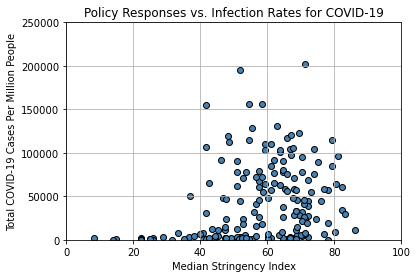

In [9]:
# Generate a scatter plot of median stringency index versus infection rates
x_values = (analysis["Median Stringency Index"])
y_values = (analysis["Total Cases Per Million"])
plt.scatter(x_values, y_values, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("Policy Responses vs. Infection Rates for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total COVID-19 Cases Per Million People")
plt.xlim(0, 100)
plt.ylim(0, 250000)
plt.grid()
plt.savefig("Outputs_NC/Policy Responses vs. Infection Rates for COVID-19 (scatter).png")
plt.show()

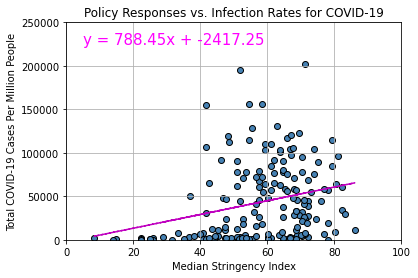

In [10]:
# Calculate the linear regression model for median stringency index versus infection rates
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.plot(x_values, regress_values, "m--")
plt.annotate(line_eq, (5, 225000), fontsize = 15, color = "magenta")
plt.title("Policy Responses vs. Infection Rates for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total COVID-19 Cases Per Million People")
plt.xlim(0, 100)
plt.ylim(0, 250000)
plt.grid()
plt.savefig("Outputs_NC/Policy Responses vs. Infection Rates for COVID-19 (linear regression).png")
plt.show()

In [11]:
# Calculate the correlation coefficient for median stringency index versus infection rates
print(f"The correlation coefficient between Median Stringency Index and Total COVID-19 Cases Per Million People is {round(st.pearsonr(x_values, y_values)[0],2)}")

The correlation coefficient between Median Stringency Index and Total COVID-19 Cases Per Million People is 0.27
